In [1]:
%load_ext autoreload
%autoreload 2

# %config InlineBackend.figure_formats = ['svg']

from IPython.display import display, Markdown

import sys, os
sys.path.insert(0, '../py_scripts')

import numpy as np
import scipy as sp
import pandas as pd
import numpy.random as rand
import scipy.stats as stats


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time
import glob
import pickle

import push_pull as pp
import noise_models as noise
import thermo_models as thermo

import fig_plot as fplot
import model_fitting as fit

sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':False})

This file uses the model parameters found from fitting to predict the antibody distributions for the phosphorylated substrate.

In [25]:
# label = "21_10_15_highgating"
label = "21_10_15_medhighgating"


df_data_info = pd.read_csv("../data/"+label+"/model_params.csv", sep=',', engine='python')

display(df_data_info)

,dataset,model,kinase_variant,kinase_zipper,pptase_variant,pptase_zipper,substrate_col,phospho_col,writer_col,eraser_col,bg_phospho_rate,kinase_phospho_rate,kinase_binding_affinity,pptase_dephospho_rate,pptase_binding_affinity,ks_stat
0,127,substrate_only,NaN,NaN,NaN,NaN,ST,SpT,WT,NaN,0.007344,NaN,NaN,NaN,NaN,0.164839
1,174,non-pplatable,174,L+A,NaN,NaN,ST,SpT,WT,NaN,NaN,NaN,NaN,NaN,NaN,0.221240
2,375,push,375,L+A,NaN,NaN,ST,SpT,WT,NaN,0.007344,0.026434,2.751879e-01,NaN,NaN,0.291821
3,419,push,419,L+A,NaN,NaN,ST,SpT,WT,NaN,0.007344,0.226296,2.751879e-01,NaN,NaN,0.178330
4,421,push,kinase_dead,L+A,NaN,NaN,ST,SpT,WT,NaN,0.007344,0.000004,2.751879e-01,NaN,NaN,0.121776
5,E+A,push,kinase_wt,E+A,NaN,NaN,ST,SpT,WT,NaN,0.007344,4.380700,2.303867e+04,NaN,NaN,0.102307
6,E+E,push,kinase_wt,E+E,NaN,NaN,ST,SpT,WT,NaN,0.007344,4.380700,7.844182e+05,NaN,NaN,0.172774
7,L+A,push,kinase_wt,L+A,NaN,NaN,ST,SpT,WT,NaN,0.007344,4.380700,2.751879e-01,NaN,NaN,0.181937
8,RR+A,push,kinase_wt,kinase_non-binding,NaN,NaN,ST,SpT,WT,NaN,0.007344,4.380700,3.125629e+06,NaN,NaN,0.218015
9,with pptase,pushpull,kinase_wt,L+A,pptase_wt,L+A,ST,SpT,WT,pptase,0.007344,4.380700,2.751879e-01,10.211135,0.275188,0.170055


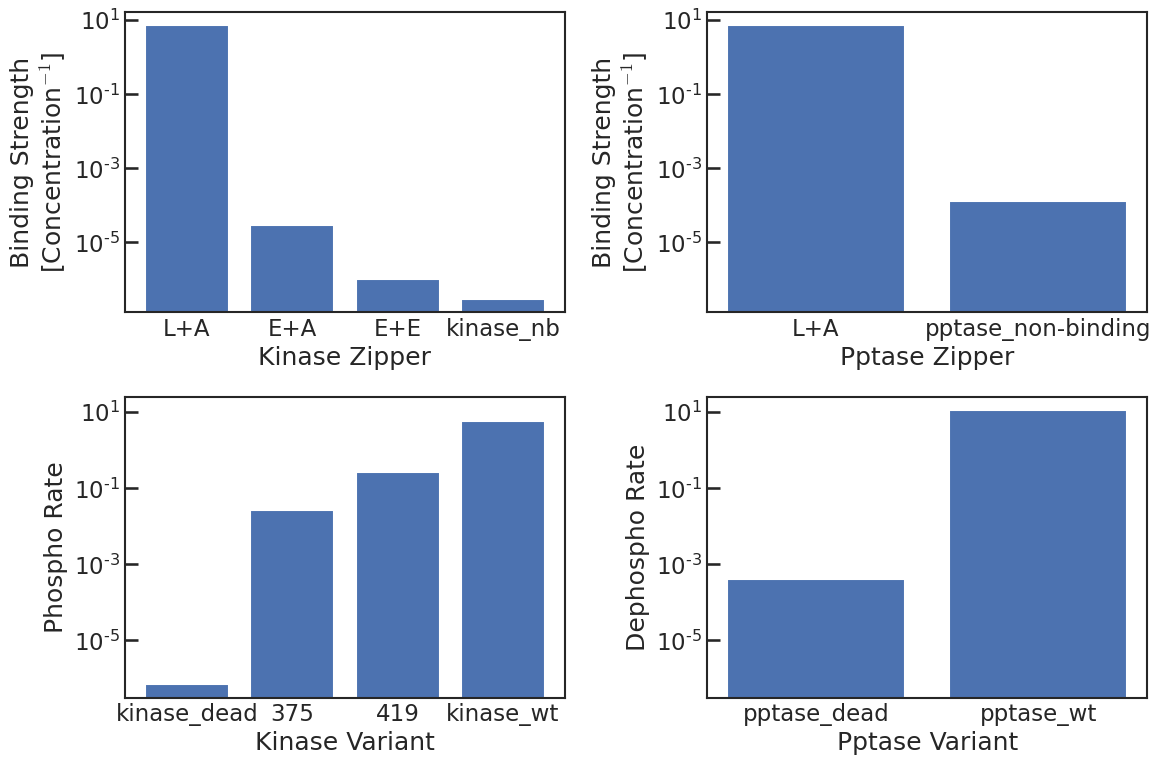

In [44]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2, sharey=ax1)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4, sharey=ax3)


ax = ax1

df_sub = df_data_info.query("model=='push'").drop_duplicates('kinase_zipper').sort_values('kinase_binding_affinity').replace({"kinase_non-binding": 'kinase_nb'})

ax.bar(df_sub['kinase_zipper'], 1/df_sub['kinase_binding_affinity'])

ax.set_yscale('log')
ax.set_xlabel("Kinase Zipper")
ax.set_ylabel("Binding Strength\n[Concentration$^{-1}$]")

ax = ax2

df_sub = df_data_info.query("model=='pushpull'").drop_duplicates('pptase_zipper').sort_values('pptase_binding_affinity').replace({"kinase_non-binding": 'pptase_nb'})

ax.bar(df_sub['pptase_zipper'], 1/df_sub['pptase_binding_affinity'])

ax.set_yscale('log')
ax.set_xlabel("Pptase Zipper")
ax.set_ylabel("Binding Strength\n[Concentration$^{-1}$]")



ax = ax3

df_sub = df_data_info.query("model=='push'").drop_duplicates('kinase_variant').sort_values('kinase_phospho_rate')

ax.bar(df_sub['kinase_variant'], df_sub['kinase_phospho_rate'])

ax.set_yscale('log')
ax.set_xlabel("Kinase Variant")
ax.set_ylabel("Phospho Rate")




ax = ax4

df_sub = df_data_info.query("model=='pushpull'").drop_duplicates('pptase_variant').sort_values('pptase_dephospho_rate')

ax.bar(df_sub['pptase_variant'], df_sub['pptase_dephospho_rate'])

ax.set_yscale('log')
ax.set_xlabel("Pptase Variant")
ax.set_ylabel("Dephospho Rate")


plt.tight_layout()

plt.show()

In [45]:
seed = 42

print("Seed:", seed)

rand.seed(seed)


noise_key = pd.read_csv("../data/"+label+"/noise_key.csv", sep=', ', engine='python')
noise_key.set_index("component", inplace=True)
display(noise_key)

# load datasets

df_list = []
for index, row in df_data_info.iterrows():
    
    
    df = pd.read_csv("../data/{}/{}.csv".format(label, row['dataset']))     
    df = df.drop("Unnamed: 0", axis=1, errors='ignore').sample(frac=1.0, replace=True, random_state=seed).reset_index(drop=True)
#     display(df)
    
    if row['model'] == 'push' or row['model'] == "substrate_only" or row['model'] == "non-pplatable":
        df = df[[row['substrate_col'],row['phospho_col'],row['writer_col']]].rename(columns={row['substrate_col']:'ST_anti_exp', 
                                                                                     row['phospho_col']:'SpT_anti_exp', 
                                                                                     row['writer_col']:'WT_anti_exp'})
    elif row['model'] == 'pushpull':
        df = df[[row['substrate_col'],row['phospho_col'],row['writer_col'],row['eraser_col']]].rename(columns={row['substrate_col']:'ST_anti_exp', 
                                                                                                       row['phospho_col']:'SpT_anti_exp', 
                                                                                                       row['writer_col']:'WT_anti_exp',
                                                                                                       row['eraser_col']:'ET_anti_exp'})

    
    df['dataset'] = row['dataset']      
    df_list.append(df)
    
# dataframe containing all datasets   
df_data = pd.concat(df_list) #.drop("Unnamed: 0", axis=1, errors='ignore')
df_data.set_index("dataset", inplace=True, append=True)
df_data = df_data.reorder_levels(df_data.index.names[::-1])
df_data.fillna(0.0, inplace=True)



print(len(df_data.index))
df_data = df_data[(df_data[df_data.columns] >= 0).all(axis=1)]
print(len(df_data.index))

# record fraction of phospho substrate
df_data['Sp_frac_anti_exp'] = df_data['SpT_anti_exp'] / df_data['ST_anti_exp']


display(df_data)

Seed: 42


,anti_label,GFP_label,empty_anti_label,empty_GFP_label
component,,,,
writer,WT,GFP,WT,GFP
eraser,pptase,GFP,pptase,GFP
substrate,ST,GFP,ST,GFP
phospho,SpT,GFP,SpT,GFP


132262
132262


ST_anti_exp  SpT_anti_exp  WT_anti_exp  ET_anti_exp  \
dataset                                                                  
127         0       596.003052    127.600983   139.194336     0.000000   
            1       642.792908     47.050320    63.249672     0.000000   
            2       504.310577     60.162514    80.487480     0.000000   
            3       975.909546    207.053024   150.405548     0.000000   
            4       504.870697     50.226593   122.371445     0.000000   
...                        ...           ...          ...          ...   
pptase dead 20012   728.979065   1658.475220  1414.776611  3427.544922   
            20013   861.156677   3132.601562  1403.224487  4458.793457   
            20014   857.985962    102.973625  1212.635132  1800.807251   
            20015   473.853760   1973.187866  1084.941284  1246.285767   
            20016  2178.468994   6118.945312  2886.015625  8448.372070   

                   Sp_frac_anti_exp  
dataset                              
127         0              0.214095  
            1              0.073197  
            2              0.119297  
            3              0.212164  
            4              0.099484  
...                             ...  
pptase dead 20012          2.275066  
            20013          3.637667  
            20014          0.120018  
            20015          4.164128  
            20016          2.808828  

[132262 rows x 5 columns]

Num Cells: 23564 Points per bin: 10 Num Bins: 48
Num Cells: 33619 Points per bin: 10 Num Bins: 57


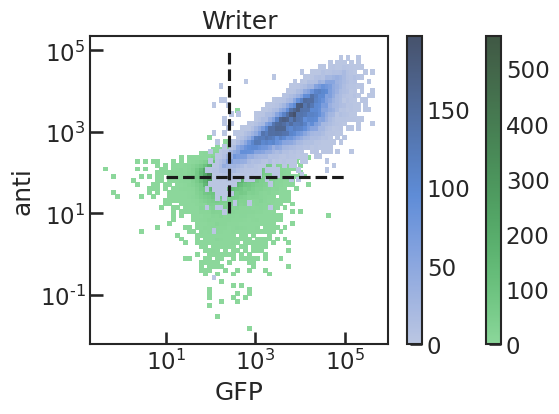

Num Cells: 26380 Points per bin: 10 Num Bins: 51
Num Cells: 33890 Points per bin: 10 Num Bins: 58


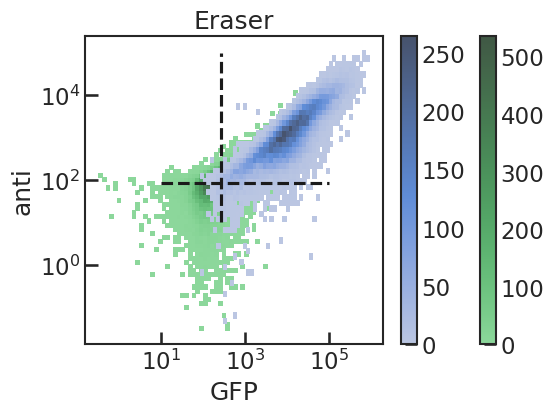

Num Cells: 27095 Points per bin: 10 Num Bins: 52
Num Cells: 20862 Points per bin: 10 Num Bins: 45


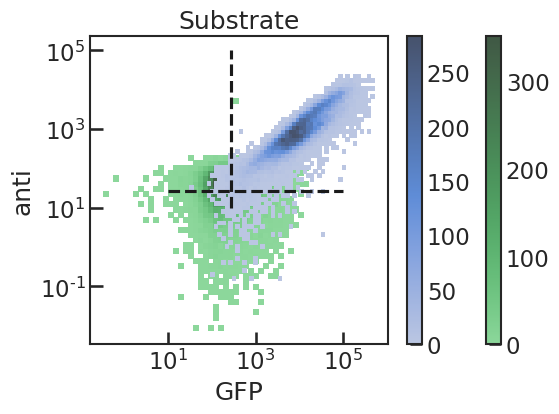

Num Cells: 27180 Points per bin: 10 Num Bins: 52
Num Cells: 30612 Points per bin: 10 Num Bins: 55


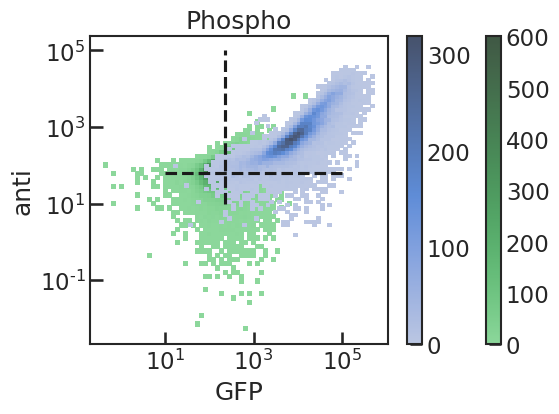

Num Cells: 27180 Points per bin: 10 Num Bins: 52
Num Cells: 57792 Points per bin: 10 Num Bins: 76


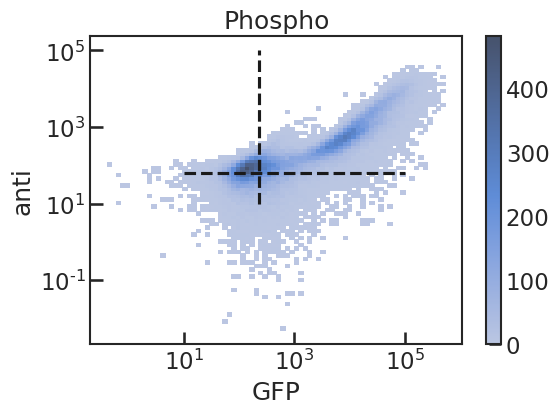

Num Cells: 27180 Points per bin: 10 Num Bins: 52
Num Cells: 30612 Points per bin: 10 Num Bins: 55


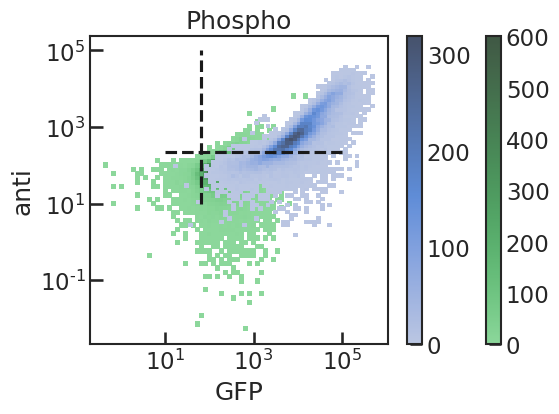

Num Cells: 57792 Points per bin: 10 Num Bins: 76


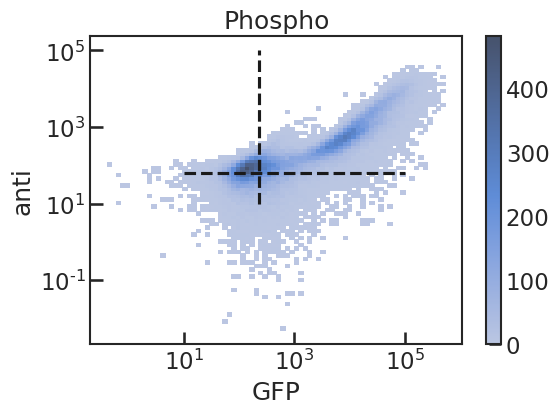

In [46]:


writer_noise = noise.Anti2GFPNoise("../data/{}/noise_writer.csv".format(label), 
                                   noise_key.loc['writer', 'anti_label'], noise_key.loc['writer', 'GFP_label'], ppbin=10, verbose=False)

empty_writer_noise = noise.Anti2GFPNoise("../data/{}/noise_empty_cell.csv".format(label), 
                                   noise_key.loc['writer', 'empty_anti_label'], noise_key.loc['writer', 'empty_GFP_label'], ppbin=10, verbose=False)


fig, ax = plt.subplots(1, 1, figsize=(6, 4))
empty_writer_noise.plot(ax, color='g')
writer_noise.plot(ax)

ax.set_title("Writer")

ax.hlines(10**np.mean(np.log10(empty_writer_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')

ax.vlines(10**np.mean(np.log10(empty_writer_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')


plt.show()


eraser_noise = noise.Anti2GFPNoise("../data/{}/noise_eraser.csv".format(label), 
                                   noise_key.loc['eraser', 'anti_label'], noise_key.loc['eraser', 'GFP_label'], ppbin=10, verbose=False)

empty_eraser_noise = noise.Anti2GFPNoise("../data/{}/noise_empty_cell.csv".format(label), 
                                   noise_key.loc['eraser', 'empty_anti_label'], noise_key.loc['eraser', 'empty_GFP_label'], ppbin=10, verbose=False)


fig, ax = plt.subplots(1, 1, figsize=(6, 4))
empty_eraser_noise.plot(ax, color='g')
eraser_noise.plot(ax)

ax.set_title("Eraser")

ax.hlines(10**np.mean(np.log10(empty_eraser_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')

ax.vlines(10**np.mean(np.log10(empty_eraser_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')


plt.show()

    
substrate_noise = noise.Anti2GFPNoise("../data/{}/noise_substrate_phospho_combined.csv".format(label), 
                                   noise_key.loc['substrate', 'anti_label'], noise_key.loc['substrate', 'GFP_label'], ppbin=10, verbose=False)

empty_substrate_noise = noise.Anti2GFPNoise("../data/{}/noise_empty_cell.csv".format(label), 
                                   noise_key.loc['substrate', 'empty_anti_label'], noise_key.loc['substrate', 'empty_GFP_label'], ppbin=10, verbose=False)



fig, ax = plt.subplots(1, 1, figsize=(6, 4))
empty_substrate_noise.plot(ax, color='g')
substrate_noise.plot(ax)
ax.set_title("Substrate")

ax.hlines(10**np.mean(np.log10(empty_substrate_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')
ax.vlines(10**np.mean(np.log10(empty_substrate_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')

plt.show()


    
phospho_noise = noise.Anti2GFPNoise("../data/{}/noise_substrate_phospho_combined.csv".format(label), 
                                   noise_key.loc['phospho', 'anti_label'], noise_key.loc['phospho', 'GFP_label'], ppbin=10, verbose=False)

empty_phospho_noise = noise.Anti2GFPNoise("../data/{}/noise_empty_cell.csv".format(label), 
                                   noise_key.loc['phospho', 'empty_anti_label'], noise_key.loc['phospho', 'empty_GFP_label'], ppbin=10, verbose=False)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

empty_phospho_noise.plot(ax, color='g')
phospho_noise.plot(ax)
ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(empty_phospho_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')
ax.vlines(10**np.mean(np.log10(empty_phospho_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')

plt.show()


combined_phospho_noise = noise.Anti2GFPNoise("../data/{}/noise_substrate_phospho_combined.csv".format(label), 
                                   noise_key.loc['phospho', 'anti_label'], noise_key.loc['phospho', 'GFP_label'], ppbin=10, verbose=False)
combined_phospho_noise.add_cells(empty_phospho_noise)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
combined_phospho_noise.plot(ax)

ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(empty_phospho_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')

ax.vlines(10**np.mean(np.log10(empty_phospho_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')


plt.show()




inverse_phospho_noise = noise.GFP2AntiNoise("../data/{}/noise_substrate_phospho_combined.csv".format(label), 
                                   noise_key.loc['phospho', 'GFP_label'], noise_key.loc['phospho', 'anti_label'], ppbin=10, verbose=False)

inverse_empty_phospho_noise = noise.GFP2AntiNoise("../data/{}/noise_empty_cell.csv".format(label),
                                   noise_key.loc['phospho', 'empty_GFP_label'], noise_key.loc['phospho', 'empty_anti_label'], ppbin=10, verbose=False)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

inverse_empty_phospho_noise.plot(ax, color='g')
inverse_phospho_noise.plot(ax)
ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_GFP())), xmin=1e1, xmax=1e5, color='k', ls='--')
ax.vlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_anti())), ymin=1e1, ymax=1e5, color='k', ls='--')

plt.show()



inverse_phospho_noise.add_cells(inverse_empty_phospho_noise)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
inverse_phospho_noise.plot(ax)

ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')

ax.vlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')


plt.show()

In [47]:
zero = 0.0

for index, row in df_data_info.iterrows():
    
    dataset = row['dataset']
    
    df_tmp = df_data.query("dataset==@dataset")
    
    # convert antibody measurements to GFP measurements
    GFP_infer, anti_bin, GFP_bin = writer_noise.anti_to_GFP(df_data.loc[df_tmp.index, 'WT_anti_exp'])
    df_data.loc[df_tmp.index, 'WT_GFP_infer'] = GFP_infer
    df_data.loc[df_tmp.index, 'WT_conc_infer'] = np.maximum(df_data.loc[df_tmp.index, 'WT_GFP_infer'] - np.median(empty_writer_noise.get_GFP()), zero)

    GFP_infer, anti_bin, GFP_bin = substrate_noise.anti_to_GFP(df_data.loc[df_tmp.index, 'ST_anti_exp'])
    df_data.loc[df_tmp.index, 'ST_GFP_infer'] = GFP_infer
    df_data.loc[df_tmp.index, 'ST_conc_infer'] = np.maximum(df_data.loc[df_tmp.index, 'ST_GFP_infer'] - np.median(empty_substrate_noise.get_GFP()), zero)

    GFP_infer, anti_bin, GFP_bin = combined_phospho_noise.anti_to_GFP(df_data.loc[df_tmp.index, 'SpT_anti_exp'])
    df_data.loc[df_tmp.index, 'SpT_GFP_infer'] = GFP_infer
    df_data.loc[df_tmp.index, 'SpT_conc_infer'] = np.maximum(df_data.loc[df_tmp.index, 'SpT_GFP_infer'] - np.median(empty_phospho_noise.get_GFP()), zero)

    df_data.loc[df_tmp.index, 'Sp_frac_GFP_infer'] = df_data.loc[df_tmp.index, 'SpT_GFP_infer'] / df_data.loc[df_tmp.index, 'ST_GFP_infer']
    df_data.loc[df_tmp.index, 'Sp_frac_conc_infer'] = df_data.loc[df_tmp.index, 'SpT_conc_infer'] / df_data.loc[df_tmp.index, 'ST_conc_infer']
      
    if row['model'] == 'pushpull':
        GFP_infer, anti_bin, GFP_bin = writer_noise.anti_to_GFP(df_data.loc[df_tmp.index, 'ET_anti_exp'])
        df_data.loc[df_tmp.index, 'ET_GFP_infer'] = GFP_infer
        df_data.loc[df_tmp.index, 'ET_conc_infer'] = np.maximum(df_data.loc[df_tmp.index, 'ET_GFP_infer'] - np.median(empty_writer_noise.get_GFP()), zero)
    else:
        df_data.loc[df_tmp.index, 'ET_GFP_infer'] = 0.0
        df_data.loc[df_tmp.index, 'ET_conc_infer'] = 0.0
    
    
display(df_data)
print(len(df_data))
print(len(df_data.dropna()))

df_data.dropna(inplace=True)

ST_anti_exp  SpT_anti_exp  WT_anti_exp  ET_anti_exp  \
dataset                                                                  
127         0       596.003052    127.600983   139.194336     0.000000   
            1       642.792908     47.050320    63.249672     0.000000   
            2       504.310577     60.162514    80.487480     0.000000   
            3       975.909546    207.053024   150.405548     0.000000   
            4       504.870697     50.226593   122.371445     0.000000   
...                        ...           ...          ...          ...   
pptase dead 20012   728.979065   1658.475220  1414.776611  3427.544922   
            20013   861.156677   3132.601562  1403.224487  4458.793457   
            20014   857.985962    102.973625  1212.635132  1800.807251   
            20015   473.853760   1973.187866  1084.941284  1246.285767   
            20016  2178.468994   6118.945312  2886.015625  8448.372070   

                   Sp_frac_anti_exp  WT_GFP_infer  WT_conc_infer  \
dataset                                                            
127         0              0.214095    532.302307     305.926071   
            1              0.073197    334.265106     107.888870   
            2              0.119297    221.987122       0.000000   
            3              0.212164    809.793824     583.417588   
            4              0.099484    184.230644       0.000000   
...                             ...           ...            ...   
pptase dead 20012          2.275066   3468.385620    3242.009384   
            20013          3.637667   1183.406494     957.030258   
            20014          0.120018   3215.857544    2989.481308   
            20015          4.164128   2292.457398    2066.081162   
            20016          2.808828   6589.751221    6363.374985   

                   ST_GFP_infer  ST_conc_infer  SpT_GFP_infer  SpT_conc_infer  \
dataset                                                                         
127         0       6229.964111    5995.590340     162.856857        0.000000   
            1       8458.594238    8224.220467     230.449577       27.562355   
            2      12964.131350   12729.757578     354.028809      151.141586   
            3       9460.180664    9225.806892    3851.792480     3648.905258   
            4      10987.011230   10752.637458    1887.300903     1684.413681   
...                         ...            ...            ...             ...   
pptase dead 20012   5886.027344    5651.653573   18758.136720    18555.249497   
            20013   9624.711426    9390.337654   49804.058595    49601.171372   
            20014  15596.412595   15362.038824     832.497009      629.609787   
            20015   2871.090942    2636.717171   25609.506835    25406.619612   
            20016   9029.091797    8794.718025   64998.683590    64795.796367   

                   Sp_frac_GFP_infer  Sp_frac_conc_infer  ET_GFP_infer  \
dataset                                                                  
127         0               0.026141            0.000000      0.000000   
            1               0.027244            0.003351      0.000000   
            2               0.027308            0.011873      0.000000   
            3               0.407158            0.395511      0.000000   
            4               0.171776            0.156651      0.000000   
...                              ...                 ...           ...   
pptase dead 20012           3.186893            3.283154   2573.102051   
            20013           5.174603            5.282150  12216.990720   
            20014           0.053377            0.040985   1546.833862   
            20015           8.919783            9.635702   3679.690796   
            20016           7.198806            7.367581  31022.351560   

                   ET_conc_infer  
dataset                           
127         0           0.000000  
            1           0.000000  
            2 

132262
131082


In [48]:
for index, row in df_data_info.iterrows():
    
    dataset = row['dataset']

    df_tmp = df_data.query("dataset==@dataset")

    if row['model'] == 'substrate_only':
        
        params = [row['bg_phospho_rate']]

        df_data.loc[df_tmp.index, 'SpT_conc_predict'] = thermo.predict_substrate_only(df_tmp['ST_conc_infer'].values, *params)

    elif row['model'] == 'non-pplatable':

        df_data.loc[df_tmp.index, 'SpT_conc_predict'] = thermo.predict_nonpplatable(df_tmp['ST_conc_infer'].values)

    elif row['model'] == 'push':
        
        params = [row['bg_phospho_rate'], row['kinase_phospho_rate'], row['kinase_binding_affinity']]

        df_data.loc[df_tmp.index, 'SpT_conc_predict'] = thermo.predict_push(df_tmp['WT_conc_infer'].values, df_tmp['ST_conc_infer'].values, *params)

    elif row['model'] == 'pushpull':
        
        params = [row['bg_phospho_rate'], row['kinase_phospho_rate'], row['kinase_binding_affinity'], row['pptase_dephospho_rate'], row['pptase_binding_affinity']]

        df_data.loc[df_tmp.index, 'SpT_conc_predict'] = thermo.predict_pushpull(df_tmp['WT_conc_infer'].values, df_tmp['ET_conc_infer'].values, df_tmp['ST_conc_infer'].values, *params)


    df_data.loc[df_tmp.index, 'SpT_GFP_predict'] = df_data.loc[df_tmp.index, 'SpT_conc_predict'] + np.median(empty_phospho_noise.get_GFP())
    
    
    anti, GFP_bins, anti_bins = inverse_phospho_noise.GFP_to_anti(df_data.loc[df_tmp.index, 'SpT_GFP_predict'])
    
    df_data.loc[df_tmp.index, 'SpT_anti_predict'] = anti
    
    df_data.loc[df_tmp.index, 'Sp_frac_conc_predict'] = df_data.loc[df_tmp.index, 'SpT_conc_predict'] / df_tmp['ST_conc_infer']
    
    df_data.loc[df_tmp.index, 'Sp_frac_anti_predict'] = df_data.loc[df_tmp.index, 'SpT_anti_predict'] / df_data.loc[df_tmp.index, 'ST_anti_exp']
    
display(df_data)

ST_anti_exp  SpT_anti_exp  WT_anti_exp  ET_anti_exp  \
dataset                                                                  
127         0       596.003052    127.600983   139.194336     0.000000   
            1       642.792908     47.050320    63.249672     0.000000   
            2       504.310577     60.162514    80.487480     0.000000   
            3       975.909546    207.053024   150.405548     0.000000   
            4       504.870697     50.226593   122.371445     0.000000   
...                        ...           ...          ...          ...   
pptase dead 20012   728.979065   1658.475220  1414.776611  3427.544922   
            20013   861.156677   3132.601562  1403.224487  4458.793457   
            20014   857.985962    102.973625  1212.635132  1800.807251   
            20015   473.853760   1973.187866  1084.941284  1246.285767   
            20016  2178.468994   6118.945312  2886.015625  8448.372070   

                   Sp_frac_anti_exp  WT_GFP_infer  WT_conc_infer  \
dataset                                                            
127         0              0.214095    532.302307     305.926071   
            1              0.073197    334.265106     107.888870   
            2              0.119297    221.987122       0.000000   
            3              0.212164    809.793824     583.417588   
            4              0.099484    184.230644       0.000000   
...                             ...           ...            ...   
pptase dead 20012          2.275066   3468.385620    3242.009384   
            20013          3.637667   1183.406494     957.030258   
            20014          0.120018   3215.857544    2989.481308   
            20015          4.164128   2292.457398    2066.081162   
            20016          2.808828   6589.751221    6363.374985   

                   ST_GFP_infer  ST_conc_infer  SpT_GFP_infer  SpT_conc_infer  \
dataset                                                                         
127         0       6229.964111    5995.590340     162.856857        0.000000   
            1       8458.594238    8224.220467     230.449577       27.562355   
            2      12964.131350   12729.757578     354.028809      151.141586   
            3       9460.180664    9225.806892    3851.792480     3648.905258   
            4      10987.011230   10752.637458    1887.300903     1684.413681   
...                         ...            ...            ...             ...   
pptase dead 20012   5886.027344    5651.653573   18758.136720    18555.249497   
            20013   9624.711426    9390.337654   49804.058595    49601.171372   
            20014  15596.412595   15362.038824     832.497009      629.609787   
            20015   2871.090942    2636.717171   25609.506835    25406.619612   
            20016   9029.091797    8794.718025   64998.683590    64795.796367   

                   Sp_frac_GFP_infer  Sp_frac_conc_infer  ET_GFP_infer  \
dataset                                                                  
127         0               0.026141            0.000000      0.000000   
            1               0.027244            0.003351      0.000000   
            2               0.027308            0.011873      0.000000   
            3               0.407158            0.395511      0.000000   
            4               0.171776            0.156651      0.000000   
...                              ...                 ...           ...   
pptase dead 20012           3.186893            3.283154   2573.102051   
            20013           5.174603            5.282150  12216.990720   
            20014           0.053377            0.040985   1546.833862   
            20015           8.919783            9.635702   3679.690796   
            20016           7.198806            7.367581  31022.351560   

                   ET_conc_infer  SpT_conc_predict  SpT_GFP_predict  \
dataset                                                               
127         

In [49]:
df_data.to_csv("../data/"+label+"/transformed_data.csv", sep=',')


KS for empty and activated controls: 0.7614209060839521


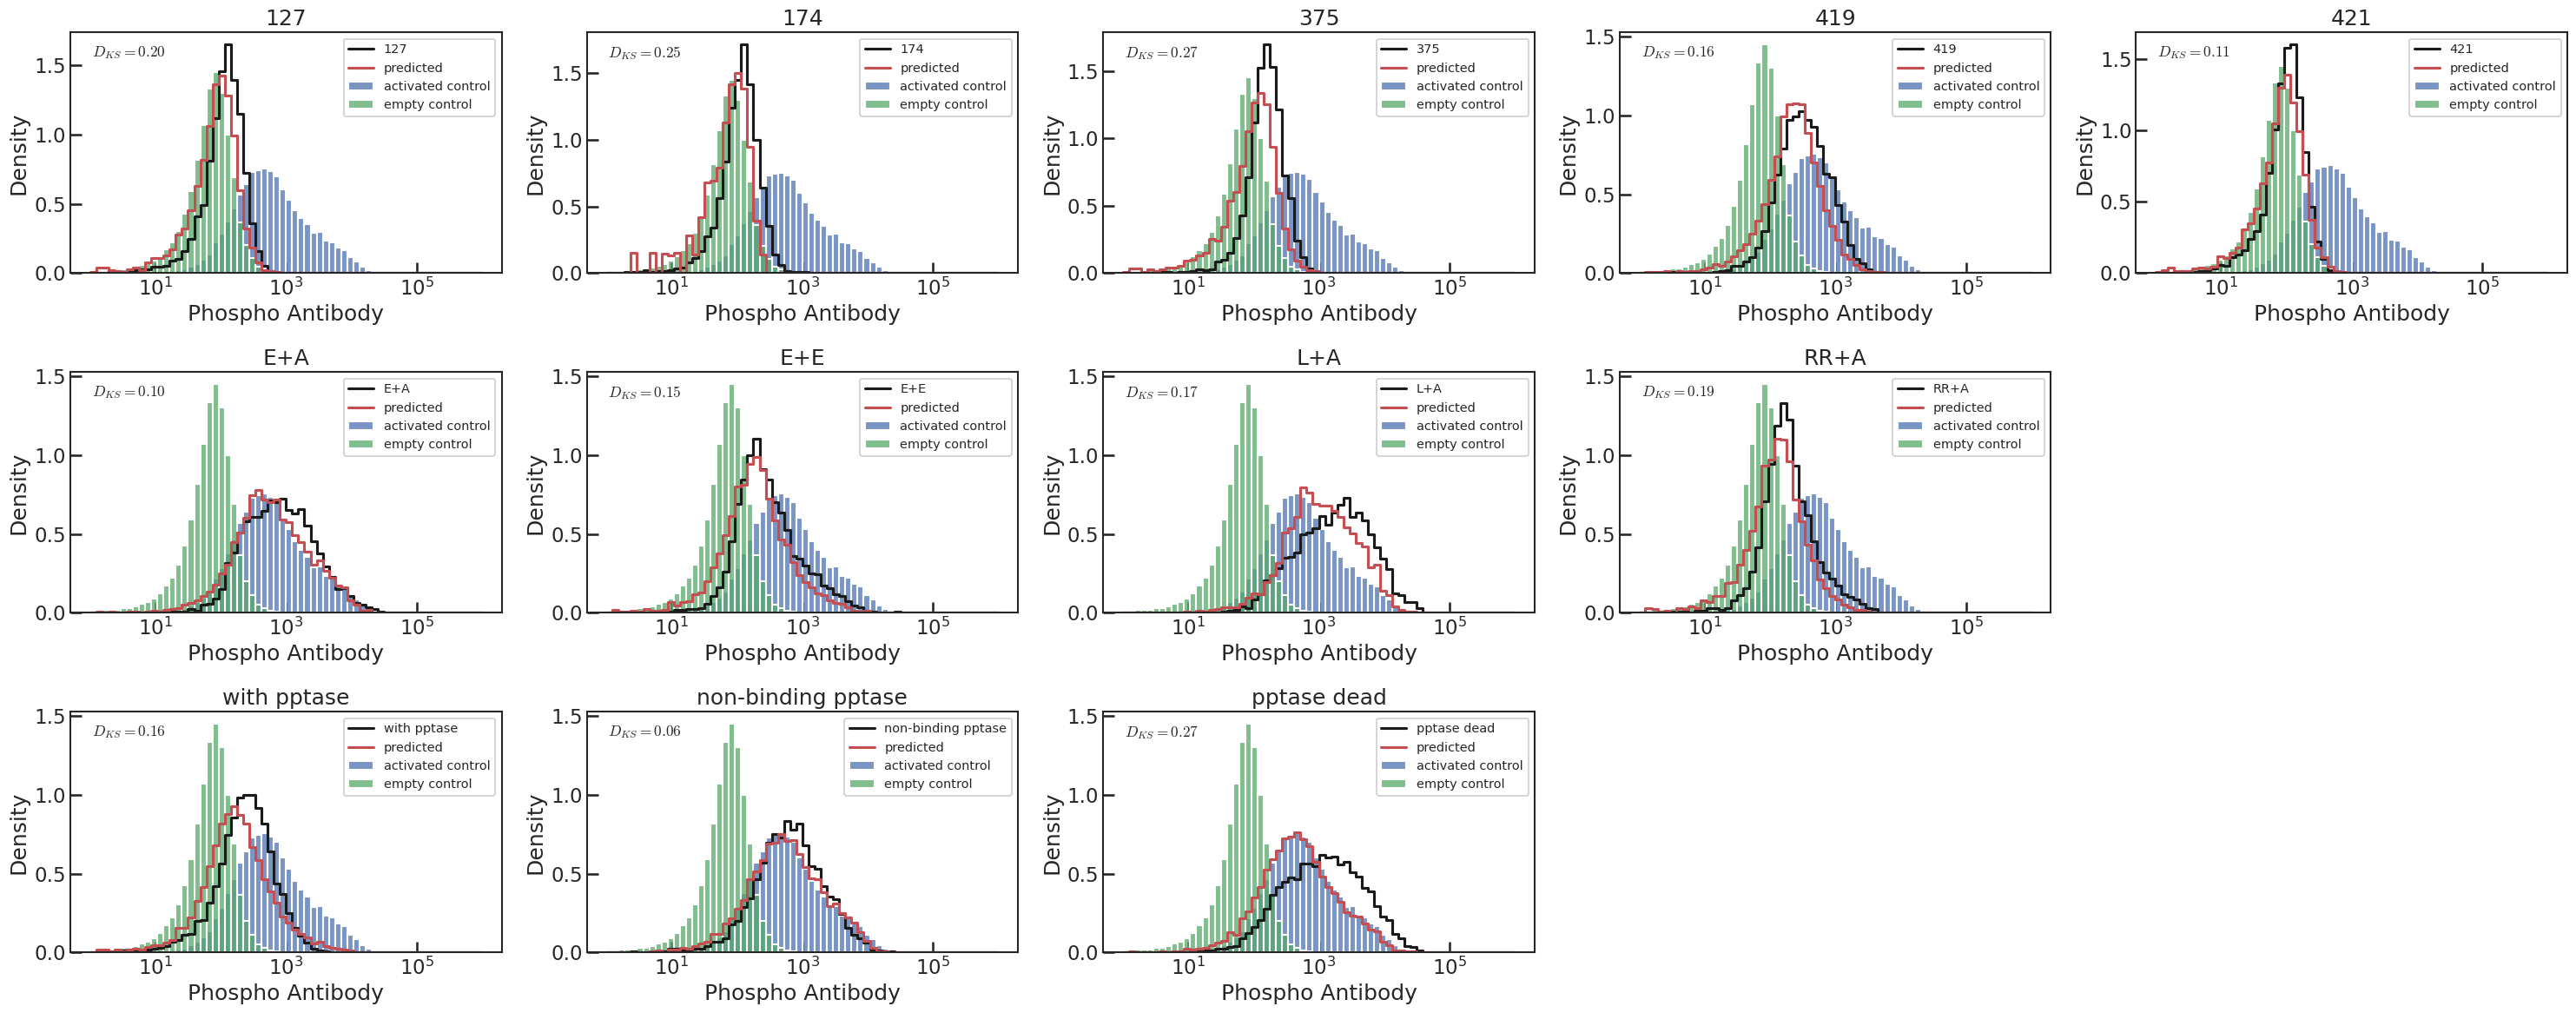

In [50]:

(ks, pval) = stats.ks_2samp(phospho_noise.get_anti(), empty_phospho_noise.get_anti())

print("KS for empty and activated controls:", ks)

binrange = (0, 6)

fig = plt.figure(figsize=(30, 12))

# which data set to put on each axis
ax_dict = {'127': 1, '174': 2, '375': 3, '419': 4, '421': 5,
          'E+A': 6, 'E+E': 7, 'L+A': 8, 'RR+A': 9,
          'with pptase': 11, 'non-binding pptase': 12, 'pptase dead': 13, 'w:o pptase': 14}

for index, row in df_data_info.iterrows():
    
    dataset = row['dataset']
    
    df_tmp = df_data.query("dataset==@dataset")
    
#     fig, ax = plt.subploted(1, 1, figsize=(6, 4))

    ax = fig.add_subplot(3, 5, ax_dict[dataset])
    
    ax.set_title(dataset)

        
    sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label=dataset, element='step', fill=False, color='k', stat='density')
    sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label='predicted', element='step', fill=False, color='r', stat='density')
    sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label='activated control', color='b', stat='density')
    sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label='empty control', color='g', stat='density')

    ax.set_xlabel("Phospho Antibody")

    ax.legend(loc='upper right', fontsize='xx-small')
        
#     ax.set_yscale('log')

    (ks, pval) = stats.ks_2samp(df_tmp['SpT_anti_exp'], df_tmp['SpT_anti_predict'])
        
    ax.text(0.05, 0.95, r"$D_{{KS}}={:.2f}$".format(ks), transform=ax.transAxes, fontsize='x-small', ha='left', va='top')
        
#     plt.tight_layout()
    
#     plt.show()
    
    df_data_info.loc[index, 'ks_stat'] = ks
    
plt.tight_layout()

plt.show()


In [51]:
df_data_info.to_csv("../data/"+label+"/model_params.csv", sep=',', index=False)

In [28]:
df_data = pd.read_csv("../data/"+label+"/transformed_data.csv", sep=',', index_col=[0, 1])
display(df_data)

df_data_info = pd.read_csv("../data/"+label+"/model_params.csv", sep=',', index_col=[0])
display(df_data_info)

/projectnb/biophys/jrocks/.conda/envs/default/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ST_anti_exp  SpT_anti_exp   WT_anti_exp  ET_anti_exp  \
dataset                                                                    
127         0       2212.525146    133.354218     79.178284     0.000000   
            1       4954.513184    112.124626     86.252625     0.000000   
            2       3487.114746    119.673706     10.157516     0.000000   
            3        253.888428    100.082169     96.854454     0.000000   
            4        584.118408     39.466415    118.221375     0.000000   
...                         ...           ...           ...          ...   
pptase dead 17681    549.983032    535.758301    711.165588  1749.370972   
            17682   1735.772461    473.518433     32.317169  4127.146484   
            17683  11315.922850   7794.784180  34337.781250  8603.736328   
            17684   1237.767822   2118.119629   2355.430664  2368.926514   
            17685    153.020218    139.286453    538.058716   189.491745   

                   Sp_frac_anti_exp  WT_GFP_infer  WT_conc_infer  \
dataset                                                            
127         0              0.060272    532.302307     305.926071   
            1              0.022631    334.265106     107.888870   
            2              0.034319    221.987122       0.000000   
            3              0.394197    809.793824     583.417588   
            4              0.067566    184.230644       0.000000   
...                             ...           ...            ...   
pptase dead 17681          0.974136   6564.525879    6338.149643   
            17682          0.272800    184.230644       0.000000   
            17683          0.688833  60632.228515   60405.852279   
            17684          1.711241  10639.057130   10412.680894   
            17685          0.910249    738.168396     511.792160   

                   ST_GFP_infer  ST_conc_infer  SpT_GFP_infer  SpT_conc_infer  \
dataset                                                                         
127         0      41787.404295   41553.030523     145.568153        0.000000   
            1      41254.041015   41019.667243     220.480973       17.593750   
            2      14826.453130   14592.079358     288.509033       85.621810   
            3       4090.584350    3856.210579     311.087829      108.200607   
            4       8244.148438    8009.774666     180.933853        0.000000   
...                         ...            ...            ...             ...   
pptase dead 17681   3910.612426    3676.238655    8883.842774     8680.955551   
            17682  11379.785645   11145.411873    9511.051269     9308.164047   
            17683  60390.285155   60155.911384  105912.925800   105710.038578   
            17684  12725.842285   12491.468513   46816.775395    46613.888173   
            17685   2750.674439    2516.300667     173.735443        0.000000   

                   Sp_frac_GFP_infer  Sp_frac_conc_infer  ET_GFP_infer  \
dataset                                                                  
127         0               0.003484            0.000000      0.000000   
            1               0.005344            0.000429      0.000000   
            2               0.019459            0.005868      0.000000   
            3               0.076050            0.028059      0.000000   
            4               0.021947            0.000000      0.000000   
...                              ...                 ...           ...   
pptase dead 17681           2.271727            2.361369   4829.401612   
            17682           0.835785            0.835157  16878.351560   
            17683           1.753807            1.757268  33714.933595   
            17684           3.678874            3.731658  20043.337890   
            17685           0.063161            0.000000    216.535568   

                   ET_conc_infer  SpT_conc_predict  SpT_GFP_predict  \
dataset                                                   

,model,kinase_variant,kinase_zipper,pptase_variant,pptase_zipper,substrate_col,phospho_col,writer_col,eraser_col,bg_phospho_rate,kinase_phospho_rate,kinase_binding_affinity,pptase_dephospho_rate,pptase_binding_affinity,ks_stat
dataset,,,,,,,,,,,,,,,
127,substrate_only,NaN,NaN,NaN,NaN,ST,SpT,WT,NaN,0.007344,NaN,NaN,NaN,NaN,0.164839
174,non-pplatable,174,L+A,NaN,NaN,ST,SpT,WT,NaN,NaN,NaN,NaN,NaN,NaN,0.221240
375,push,375,L+A,NaN,NaN,ST,SpT,WT,NaN,0.007344,0.026434,2.751879e-01,NaN,NaN,0.291821
419,push,419,L+A,NaN,NaN,ST,SpT,WT,NaN,0.007344,0.226296,2.751879e-01,NaN,NaN,0.178330
421,push,kinase_dead,L+A,NaN,NaN,ST,SpT,WT,NaN,0.007344,0.000004,2.751879e-01,NaN,NaN,0.121776
E+A,push,kinase_wt,E+A,NaN,NaN,ST,SpT,WT,NaN,0.007344,4.380700,2.303867e+04,NaN,NaN,0.102307
E+E,push,kinase_wt,E+E,NaN,NaN,ST,SpT,WT,NaN,0.007344,4.380700,7.844182e+05,NaN,NaN,0.172774
L+A,push,kinase_wt,L+A,NaN,NaN,ST,SpT,WT,NaN,0.007344,4.380700,2.751879e-01,NaN,NaN,0.181937
RR+A,push,kinase_wt,kinase_non-binding,NaN,NaN,ST,SpT,WT,NaN,0.007344,4.380700,3.125629e+06,NaN,NaN,0.218015


In [29]:
print("Average KS-stat:", df_data_info['ks_stat'].mean())

MSE = np.sum((np.log10(df_data['SpT_GFP_infer'])-np.log10(df_data['SpT_GFP_predict']))**2)
var = np.sum((np.log10(df_data['SpT_GFP_infer'])-np.log10(df_data['SpT_GFP_infer']).mean())**2)

R2 = 1 - MSE/var
print("R2 stat:", R2)



Average KS-stat: 0.17922140925464988
67722.61565255074 109537.6530027258
R2 stat: 0.3817412205201668


# The rest of this is old code

In [ ]:
# label = '210620'

label = '210728'

flag_label = 'Flag Antibody'
myc_label = 'Myc Antibody'

df_list = []


try:
    with open('/projectnb/biophys/jrocks/proj_push_pull/data/pushnomixture_{}.pkl'.format(label), 'rb') as pkl_file:

        data = pickle.load(pkl_file)
        df_list.append(data['df_info'])
except:
    pass
    
    
for i, f in enumerate(glob.iglob(r'/projectnb/biophys/jrocks/proj_push_pull/data/pushnomixture_{}_*.pkl'.format(label))):
    
    if i % 1000 == 0:
        print(i)
   
    with open(f, 'rb') as pkl_file:
    
        data = pickle.load(pkl_file)

        df_info = data['df_info']
        
    df_list.append(df_info)
    
    
print(len(df_list))
    
df_info = pd.concat(df_list)

df_info.set_index(['dataset', 'seed'], inplace=True)
df_info.sort_index(inplace=True)

df_info = df_info[~df_info.index.duplicated(keep='last')].copy()

print("seeds", df_info.index.get_level_values('seed').nunique())

df_info.reset_index(inplace=True)


display(df_info)


with open('/projectnb/biophys/jrocks/proj_push_pull/data/pushnomixture_{}.pkl'.format(label), 'wb') as pkl_file:
    
    data = {'df_info': df_info}
    pickle.dump(data, pkl_file)


In [8]:
for f in glob.iglob(r'/projectnb/biophys/jrocks/proj_push_pull/data/push_{}_*.pkl'.format(label)):
    os.remove(f)

In [ ]:
seed = 42

# load datasets

df_list = []
for index, row in df_avg.reset_index().iterrows():
    df = pd.read_csv("../data/{}_push/{}.csv".format(label, row['dataset'])) 
    
    df = df.drop("Unnamed: 0", axis=1, errors='ignore').reset_index(drop=True)
        
    df['dataset'] = row['dataset'] 
    print(len(df))
    df_list.append(df)
    
# dataframe containing all datasets   
df_data = pd.concat(df_list).drop("Unnamed: 0", axis=1, errors='ignore')
df_data.set_index("dataset", inplace=True, append=True)
df_data = df_data.reorder_levels(df_data.index.names[::-1])
df_data = df_data.rename(columns={'WT_anti': 'WT_anti_exp', 'ST_anti': 'ST_anti_exp', 'SpT_anti': 'SpT_anti_exp', 'Flag : APC - Area': 'WT_anti_exp'})
df_data = df_data[(df_data[df_data.columns[:-1]] > 0).all(axis=1)]
df_data['Sp_frac_anti_exp'] = df_data['SpT_anti_exp'] / df_data['ST_anti_exp']

display(df_data)

In [ ]:
nbins_anti = 100
nbins_GFP = 100

writer_noise = noise.Anti2GFPNoise("../data/{}_noise/Flag noise.csv".format(label), 
                                   flag_label, 'GFP', ppbin=10, verbose=False)

empty_writer_noise = noise.Anti2GFPNoise("../data/{}_noise/Empty Cell.csv".format(label), 
                                   flag_label, 'GFP', ppbin=10, verbose=False)


fig, ax = plt.subplots(1, 1, figsize=(6, 4))
empty_writer_noise.plot(ax, color='g')
writer_noise.plot(ax)

ax.set_title("Writer")

ax.hlines(10**np.mean(np.log10(empty_writer_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')

ax.vlines(10**np.mean(np.log10(empty_writer_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')


plt.show()

    
substrate_noise = noise.Anti2GFPNoise("../data/{}_noise/Myc_Phospho noise.csv".format(label), 
                                   myc_label, 'GFP', ppbin=10, verbose=False)

empty_substrate_noise = noise.Anti2GFPNoise("../data/{}_noise/Empty Cell.csv".format(label), 
                                   myc_label, 'GFP', ppbin=10, verbose=False)



fig, ax = plt.subplots(1, 1, figsize=(6, 4))
empty_substrate_noise.plot(ax, color='g')
substrate_noise.plot(ax)
ax.set_title("Substrate")

ax.hlines(10**np.mean(np.log10(empty_substrate_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')
ax.vlines(10**np.mean(np.log10(empty_substrate_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')

plt.show()


    
phospho_noise = noise.Anti2GFPNoise("../data/{}_noise/Myc_Phospho noise.csv".format(label), 
                                   'Phospho', 'GFP', ppbin=10, verbose=False)

empty_phospho_noise = noise.Anti2GFPNoise("../data/{}_noise/Empty Cell.csv".format(label), 
                                   'Phospho', 'GFP', ppbin=10, verbose=False)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

empty_phospho_noise.plot(ax, color='g')
phospho_noise.plot(ax)
ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(empty_phospho_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')
ax.vlines(10**np.mean(np.log10(empty_phospho_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')

plt.show()


combined_phospho_noise = noise.Anti2GFPNoise("../data/{}_noise/Myc_Phospho noise.csv".format(label), 
                                   'Phospho', 'GFP', ppbin=10, verbose=False)
combined_phospho_noise.add_cells(empty_phospho_noise)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
combined_phospho_noise.plot(ax)

ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(empty_phospho_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')

ax.vlines(10**np.mean(np.log10(empty_phospho_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')


plt.show()



inverse_phospho_noise = noise.GFP2AntiNoise("../data/{}_noise/Myc_Phospho noise.csv".format(label), 
                                   'GFP', 'Phospho', ppbin=10, verbose=False)

inverse_empty_phospho_noise = noise.GFP2AntiNoise("../data/{}_noise/Empty Cell.csv".format(label), 
                                   'GFP', 'Phospho', ppbin=10, verbose=False)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

inverse_empty_phospho_noise.plot(ax, color='g')
inverse_phospho_noise.plot(ax)
ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_GFP())), xmin=1e1, xmax=1e5, color='k', ls='--')
ax.vlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_anti())), ymin=1e1, ymax=1e5, color='k', ls='--')

plt.show()



inverse_phospho_noise.add_cells(inverse_empty_phospho_noise)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
inverse_phospho_noise.plot(ax)

ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')

ax.vlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')


plt.show()



In [ ]:

for index, row in df_avg.reset_index().iterrows():
    
    dataset = row['dataset']
    
    print(dataset)
    
    df_tmp = df_data.query("dataset==@dataset")
    
    ################################################################
    
    
    writer_empty_frac = row['WT_empty_frac']
    writer_anti_scale = row['WT_anti_scale']
   
    df_data.loc[df_tmp.index, 'WT_anti_rescaled'] = df_tmp['WT_anti_exp'] / 10**writer_anti_scale
        
        
    df_data.loc[df_tmp.index, 'WT_prob_empty'] = noise.calc_prob_empty(df_data.loc[df_tmp.index, 'WT_anti_rescaled'], 
                                                                 writer_empty_frac, 
                                                                 empty_writer_noise, writer_noise)
    
    
    ################################################################

    
    substrate_empty_frac = row['ST_empty_frac']
    substrate_anti_scale = row['ST_anti_scale']
 
            
    df_data.loc[df_tmp.index, 'ST_anti_rescaled'] = df_tmp['ST_anti_exp'] / 10**substrate_anti_scale
    
        
    df_data.loc[df_tmp.index, 'ST_prob_empty'] = noise.calc_prob_empty(df_data.loc[df_tmp.index, 'ST_anti_rescaled'], 
                                                                 substrate_empty_frac, 
                                                                 empty_substrate_noise, substrate_noise)
    

In [ ]:
# convert antibody values to inferred GFP values using noise models

zero = 0.0

for index, row in df_avg.reset_index().iterrows():
    
    dataset = row['dataset']
    
    df_tmp = df_data.query("dataset==@dataset")
    
    # convert antibody measurements to GFP measurements
    GFP_infer, anti_bin, GFP_bin = writer_noise.anti_to_GFP(df_data.loc[df_tmp.index, 'WT_anti_rescaled'])
    df_data.loc[df_tmp.index, 'WT_GFP_infer'] = GFP_infer
#     df_data.loc[df_tmp.index, 'WT_anti_bin'] = anti_bin
#     df_data.loc[df_tmp.index, 'WT_GFP_bin'] = GFP_bin
    df_data.loc[df_tmp.index, 'WT_conc_infer'] = np.maximum(df_data.loc[df_tmp.index, 'WT_GFP_infer'] - np.median(empty_writer_noise.get_GFP()), zero)

    GFP_infer, anti_bin, GFP_bin = substrate_noise.anti_to_GFP(df_data.loc[df_tmp.index, 'ST_anti_rescaled'])
    df_data.loc[df_tmp.index, 'ST_GFP_infer'] = GFP_infer
#     df_data.loc[df_tmp.index, 'ST_anti_bin'] = anti_bin
#     df_data.loc[df_tmp.index, 'ST_GFP_bin'] = GFP_bin
    df_data.loc[df_tmp.index, 'ST_conc_infer'] = np.maximum(df_data.loc[df_tmp.index, 'ST_GFP_infer'] - np.median(empty_substrate_noise.get_GFP()), zero)

    
    GFP_infer, anti_bin, GFP_bin = combined_phospho_noise.anti_to_GFP(df_data.loc[df_tmp.index, 'SpT_anti_exp'])
    df_data.loc[df_tmp.index, 'SpT_GFP_infer'] = GFP_infer
#     df_data.loc[df_tmp.index, 'SpT_anti_bin'] = anti_bin
#     df_data.loc[df_tmp.index, 'SpT_GFP_bin'] = GFP_bin
    df_data.loc[df_tmp.index, 'SpT_conc_infer'] = np.maximum(df_data.loc[df_tmp.index, 'SpT_GFP_infer'] - np.median(empty_phospho_noise.get_GFP()), zero)

    df_data.loc[df_tmp.index, 'Sp_frac_GFP_infer'] = df_data.loc[df_tmp.index, 'SpT_GFP_infer'] / df_data.loc[df_tmp.index, 'ST_GFP_infer']
    df_data.loc[df_tmp.index, 'Sp_frac_conc_infer'] = df_data.loc[df_tmp.index, 'SpT_conc_infer'] / df_data.loc[df_tmp.index, 'ST_conc_infer']
    
    
    df_data.loc[df_tmp.index, 'total_prob_empty'] = 1.0  - (1-df_data.loc[df_tmp.index, 'ST_prob_empty'])*(1-df_data.loc[df_tmp.index, 'WT_prob_empty'])
    
    
    
display(df_data)
print(len(df_data))
print(len(df_data.dropna()))


In [ ]:
binrange = (0, 6)

for index, row in df_avg.reset_index().iterrows():
    
    dataset = row['dataset']
    
    # need to dropna, but filler for new column is also nan, need to initialize beforehand
    
    df_tmp = df_data.dropna(subset=['ST_GFP_infer', 'WT_GFP_infer', 'SpT_GFP_infer']).query("dataset==@dataset").copy()  
        
    model_params = np.array([row['bg_phospho_rate'], 
                             row['kinase_phospho_rate'], 
                             row['kinase_bind_affin']])
    
    df_data.loc[df_tmp.index, 'SpT_conc_predict'] = pp.PushAmp().predict_all(df_tmp[['WT_conc_infer', 'ST_conc_infer']].values, model_params)[:, 0]
    df_data.loc[df_tmp.index, 'SpT_GFP_predict'] = df_data.loc[df_tmp.index, 'SpT_conc_predict'] + np.median(empty_phospho_noise.get_GFP())
    
    df_data.loc[df_tmp.index, 'Sp_frac_GFP_predict'] = df_data.loc[df_tmp.index, 'SpT_GFP_predict'] / df_tmp['ST_GFP_infer']

    
    anti, GFP_bins, anti_bins = inverse_phospho_noise.GFP_to_anti(df_data.loc[df_tmp.index, 'SpT_GFP_predict'])
    
    df_data.loc[df_tmp.index, 'SpT_anti_predict'] = anti
    
    df_data.loc[df_tmp.index, 'Sp_frac_conc_predict'] = df_data.loc[df_tmp.index, 'SpT_conc_predict'] / df_tmp['ST_conc_infer']
    
    df_data.loc[df_tmp.index, 'Sp_frac_anti_predict'] = df_data.loc[df_tmp.index, 'SpT_anti_predict'] / df_data.loc[df_tmp.index, 'ST_anti_exp']
    
    fig, axes = plt.subplots(1, 1, figsize=(6, 4))
    
    fig.suptitle(dataset)

    
    ax = axes
    
    sns.histplot(df_data.loc[df_tmp.index, 'SpT_anti_exp'], binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label=dataset, element='step', fill=False, color='k', stat='density')
    sns.histplot(df_data.loc[df_tmp.index, 'SpT_anti_predict'], binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label='predicted', element='step', fill=False, color='r', stat='density')
    sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label='activated control', color='b', stat='density')
    sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label='empty control', color='g', stat='density')

    ax.set_xlabel("Phospho Antibody")

    ax.legend(loc='upper right', fontsize='xx-small')
        
#     ax.set_yscale('log')
        
    plt.tight_layout()
    
    plt.show()
        

In [ ]:
with open('/projectnb/biophys/jrocks/proj_push_pull/data/dfnomixture_{}.pkl'.format(label), 'wb') as pkl_file:
    
    data = {'df': df_data}
    pickle.dump(data, pkl_file)
    
display(df_data)

In [ ]:
with open('/projectnb/biophys/jrocks/proj_push_pull/data/dfnomixture_{}.pkl'.format(label), 'rb') as pkl_file:
    
    data = pickle.load(pkl_file)
    df_data = data['df']
    
display(df_data)

In [7]:
# df_data.to_excel("push_210728.xlsx")

df_data.to_csv("push_210728.csv")

In [ ]:
for index, row in df_avg.reset_index().iterrows():

    dataset = row['dataset']
    
    df_tmp = df_data.query("dataset==@dataset").copy()

    fig = plt.figure(constrained_layout=True, figsize=(16, 10))
    
    gs = fig.add_gridspec(2, 4)

    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 0])
    
    fplot.plot_2d_avg(df_tmp, fig, ax, 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_exp', logscale=True, vmin=1e2, vmax=1e4)
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 1])
    
    fplot.plot_activation_curves(df_tmp, fig, ax, 
                                 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_exp', normalizex=False, normalizey=False)
    
    
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 2])
    
    fplot.plot_2d_avg(df_tmp.dropna().copy(), fig, ax, 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_predict', logscale=True, vmin=1e2, vmax=1e4)
    
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 3])
    
    fplot.plot_activation_curves(df_tmp.dropna().copy(), fig, ax, 
                                 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_predict', normalizex=False, normalizey=False)

    
    ##########################################################
    
    
    ax = fig.add_subplot(gs[1, 0])
    
    fplot.plot_2d_avg(df_tmp, fig, ax, 'WT_anti_exp', 'ST_anti_exp', 'Sp_frac_anti_exp', logscale=False, vmin=0.0, vmax=1.5)
    
    
    ############################################################
    
    
    ax = fig.add_subplot(gs[1, 1])
    
    fplot.plot_activation_curves(df_tmp, fig, ax, 
                                 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_exp', normalizex=True, normalizey=True, xlim=(1e-1, 1e2), ylim=(0, 1.5))
    
    
    ############################################################
    
    ax = fig.add_subplot(gs[1, 2])
    
    fplot.plot_2d_avg(df_tmp.dropna().copy(), fig, ax, 'WT_anti_exp', 'ST_anti_exp', 'Sp_frac_anti_predict', logscale=False, vmin=0.0, vmax=1.5)
    
    
    ############################################################
    
    ax = fig.add_subplot(gs[1, 3])
    
    fplot.plot_activation_curves(df_tmp.dropna().copy(), fig, ax, 
                                 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_predict', normalizex=True, normalizey=True, xlim=(1e-1, 1e2), ylim=(0, 1.5))
    
    ##########################################################

    fig.suptitle("Dataset: {0}, Inverse Zipper Strength: {1:.2f}, Phospho Rate: {2:.2f}".format(dataset, row['kinase_bind_affin'], row['kinase_phospho_rate']))

    plt.show()
    

In [ ]:
for index, row in df_avg.reset_index().iterrows():

    dataset = row['dataset']
    
    df_tmp = df_data.dropna().query("dataset==@dataset").copy()

    fig = plt.figure(constrained_layout=True, figsize=(16, 10))
    
    gs = fig.add_gridspec(2, 4)

    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 0])
    
    fplot.plot_2d_avg(df_tmp, fig, ax, 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_infer', logscale=True, xlim=(1e2, 1e6), ylim=(1e2, 1e6), vmin=0.5e3, vmax=1e5)
    
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 1])
    
    fplot.plot_activation_curves(df_tmp, fig, ax, 
                                 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_infer', normalizex=False, normalizey=False, xlim=(1e2, 1e6), ylim=(0.5e3, 1e5))
    
    
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 2])
    
    fplot.plot_2d_avg(df_tmp.copy(), fig, ax, 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_predict', logscale=True, xlim=(1e2, 1e6), ylim=(1e2, 1e6), vmin=0.5e3, vmax=1e5)
    
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 3])
    
    fplot.plot_activation_curves(df_tmp.copy(), fig, ax, 
                                 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_predict', normalizex=False, normalizey=False, xlim=(1e2, 1e6), ylim=(0.5e3, 1e5))

    
    ##########################################################
    
    
    ax = fig.add_subplot(gs[1, 0])
    
    fplot.plot_2d_avg(df_tmp, fig, ax, 'WT_GFP_infer', 'ST_GFP_infer', 'Sp_frac_GFP_infer', logscale=False, xlim=(1e2, 1e6), ylim=(1e2, 1e6), vmin=0, vmax=2.5)
    
    
    ############################################################
    
    
    ax = fig.add_subplot(gs[1, 1])
    
    fplot.plot_activation_curves(df_tmp, fig, ax, 
                                 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_infer', normalizex=True, normalizey=True, xlim=(1e-3, 1e2), ylim=(0.0, 2.5))
    
        
    ############################################################
    
    ax = fig.add_subplot(gs[1, 2])
    
    fplot.plot_2d_avg(df_tmp, fig, ax, 'WT_GFP_infer', 'ST_GFP_infer', 'Sp_frac_GFP_predict', logscale=False, xlim=(1e2, 1e6), ylim=(1e2, 1e6), vmin=0, vmax=2.5)
    
    ax.vlines(row['kinase_bind_affin']+np.median(empty_writer_noise.get_GFP()), ymin=1e2, ymax=1e6, ls='--', color='k')

    
    ############################################################
    
    ax = fig.add_subplot(gs[1, 3])
    
    fplot.plot_activation_curves(df_tmp, fig, ax, 
                                 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_predict', normalizex=True, normalizey=True, xlim=(1e-3, 1e2), ylim=(0.0, 2.5))
    
    ##########################################################

    fig.suptitle("Dataset: {0}, Inverse Zipper Strength: {1:.2f}, Phospho Rate: {2:.2f}".format(dataset, row['kinase_bind_affin'], row['kinase_phospho_rate']))

    plt.show()
                
        


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))


binrange = (0, 5)
nbins = 75

alpha = 0.2


####################################################

ax = axes[0, 0]

dataset = 'RR_250'
    
df_tmp = df_data.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


# ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate\nConcentraion")
ax.set_ylabel("Probability Density")
ax.set_title("Weak Binding Affinity")



####################################################


ax = axes[0, 1]

dataset = 'S+E_250'
    
df_tmp = df_data.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


# ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate\nConcentraion")
ax.set_ylabel("Probability Density")
ax.set_title("Moderate Binding Affinity")



####################################################



ax = axes[0, 2]

dataset = 'E_250'
    
df_tmp = df_data.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


# ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate\nConcentraion")
ax.set_ylabel("Probability Density")
ax.set_title("Strong Binding Affinity")



####################################################


ax = axes[1, 0]

dataset = '421_1000'
    
df_tmp = df_data.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


# ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate\nConcentraion")
ax.set_ylabel("Probability Density")
ax.set_title("Low PPlation Rate")



####################################################


ax = axes[1, 1]

dataset = '419'
    
df_tmp = df_data.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


# ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate\nConcentraion")
ax.set_ylabel("Probability Density")
ax.set_title("Moderate PPlation Rate")


####################################################


ax = axes[1, 2]

dataset = 'L_250'
    
df_tmp = df_data.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


# ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate\nConcentraion")
ax.set_ylabel("Probability Density")
ax.set_title("High PPlation Rate")


####################################################

# handles, labels = ax.get_legend_handles_labels()
# handles = [handles[1], handles[0], handles[3], handles[2]]
# labels = [labels[1], labels[0], labels[3], labels[2]]
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=4)


plt.tight_layout()


plt.show()

